In [1]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:06<00:00, 255MB/s]
100% 1.06G/1.06G [00:06<00:00, 168MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [4]:
import cv2

In [5]:
image = cv2.imread('/content/train/cats/cat.1.jpg',cv2.IMREAD_COLOR)

In [6]:
print(image)

[[[ 40  44  39]
  [ 40  44  39]
  [ 43  44  40]
  ...
  [173 204 207]
  [166 199 202]
  [163 198 201]]

 [[ 41  45  40]
  [ 41  45  40]
  [ 43  44  40]
  ...
  [169 200 203]
  [163 196 199]
  [159 194 197]]

 [[ 41  45  40]
  [ 41  45  40]
  [ 43  44  40]
  ...
  [166 195 199]
  [164 194 199]
  [162 194 199]]

 ...

 [[ 31  30  32]
  [ 29  28  30]
  [ 25  24  26]
  ...
  [ 17  23  36]
  [ 24  30  41]
  [ 40  46  57]]

 [[ 31  30  32]
  [ 29  28  30]
  [ 25  24  26]
  ...
  [ 21  29  42]
  [ 25  34  44]
  [ 36  45  55]]

 [[ 31  30  32]
  [ 28  27  29]
  [ 24  23  25]
  ...
  [ 30  38  51]
  [ 23  32  42]
  [ 21  30  40]]]


In [7]:
#Generators, divide data into batches, load accordingly

train_ds = keras.utils.image_dataset_from_directory(
    directory = ('/content/train'),
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = ('/content/test'),
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def process(image, label):
    image = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Let's Create the CNN Model
This is a linear stack of layers. Each layer in the model is added sequentially, one after another.

Conv2D Layers: These layers apply convolution operations to the input images. Convolutions help in detecting features like edges, textures, and patterns.

First Conv2D Layer: 32 filters with a 3x3 kernel size, applied to the input image of shape (256, 256, 3).

Second Conv2D Layer: 64 filters with a 3x3 kernel size, applied to the feature maps from the previous layer.

Third Conv2D Layer: 128 filters with a 3x3 kernel size, applied to the feature maps from the previous layer. activation='relu': ReLU (Rectified Linear Unit) is used as the activation function to introduce non-linearity. padding='valid': No padding is applied, meaning the output is smaller than the input.

MaxPooling Layers: MaxPooling2D Layers: These layers downsample the feature maps by taking the maximum value in each region, reducing the spatial dimensions. pool_size=(2,2): The pooling operation is applied over 2x2 blocks. strides=2: The sliding window moves 2 pixels at a time. padding='valid': No padding is applied.

Flatten Layer: This layer flattens the 2D feature maps into a 1D vector, preparing it for the dense (fully connected) layers.

Dense Layers (Fully Connected Layers):

First Dense Layer:128 units with ReLU activation. This layer learns complex patterns from the flattened features.

Second Dense Layer:64 units with ReLU activation. Further refines the learned features.

Final Dense Layer: 1 unit with Sigmoid activation. This layer outputs a probability (between 0 and 1) that the image belongs to one of the two classes (cats or dogs).

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

#model.add(Conv2D(filters=120, kernel_size=(3, 3), activation='relu'))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 83ms/step - accuracy: 0.5799 - loss: 0.6696 - val_accuracy: 0.7280 - val_loss: 0.5407
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 92ms/step - accuracy: 0.7485 - loss: 0.5117 - val_accuracy: 0.7892 - val_loss: 0.4561
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8098 - loss: 0.4146 - val_accuracy: 0.7928 - val_loss: 0.4660
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.8671 - loss: 0.3100 - val_accuracy: 0.7796 - val_loss: 0.6284
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 79ms/step - accuracy: 0.9171 - loss: 0.2033 - val_accuracy: 0.7772 - val_loss: 0.6956
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 79ms/step - accuracy: 0.9553 - loss: 0.1148 - val_accuracy: 0.7654 - val_loss: 1.1712
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.9679 - loss: 0.0914 - val_accuracy: 0.7818 - val_loss: 0.9681
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.9800 - loss: 0.0542 - 

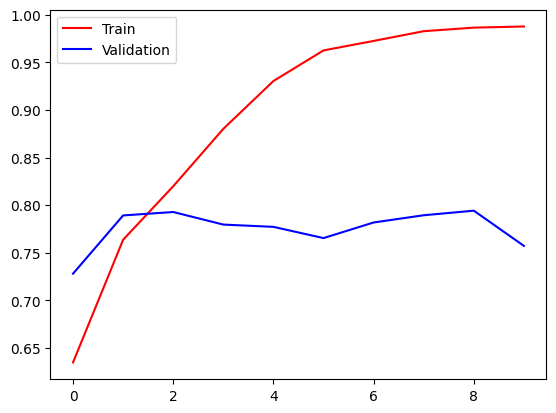

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red', label='Train')
plt.plot(history.history['val_accuracy'],color='blue', label='Validation')
plt.legend()
plt.show()

Model seems to be Overfit

We reduce it by following methods

1- Add more data

2- Data Augmentation

3- L1/L2 Regularization

4- Dropout

5- Batch Norm

6- Reduce Complexity

In [18]:
# Again create model with Batch Norm to avoid the OFitting issue

# Create CNN Model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history_2 = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 86ms/step - accuracy: 0.5490 - loss: 2.7762 - val_accuracy: 0.6456 - val_loss: 0.6836
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 87ms/step - accuracy: 0.6803 - loss: 0.6024 - val_accuracy: 0.6180 - val_loss: 0.7601
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.7450 - loss: 0.5218 - val_accuracy: 0.7314 - val_loss: 0.5251
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.7989 - loss: 0.4394 - val_accuracy: 0.7548 - val_loss: 0.4967
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 83ms/step - accuracy: 0.8355 - loss: 0.3757 - val_accuracy: 0.7340 - val_loss: 0.5500
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.8611 - loss: 0.3156 - val_accuracy: 0.7586 - val_loss: 0.6598
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.9048 - loss: 0.2303 - val_accuracy: 0.8158 - val_loss: 0.5326
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9317 - loss: 0.1719 - 

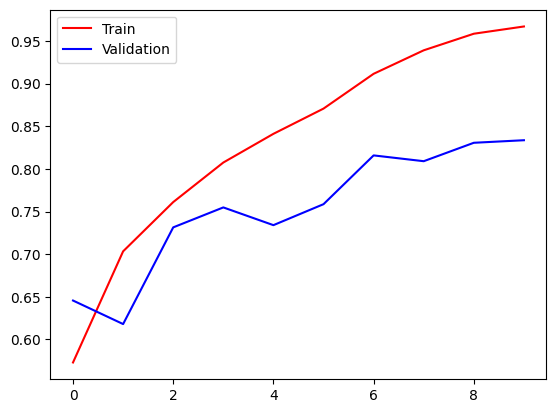

In [21]:
plt.plot(history_2.history['accuracy'],color='red', label='Train')
plt.plot(history_2.history['val_accuracy'],color='blue', label='Validation')
plt.legend()
plt.show()

In [22]:
# prompt: save the model2 in pickel

import pickle

# Save the model to a file
with open('model2.pkl', 'wb') as f:
    pickle.dump(model, f)


Much better as compared to previous
Let's test our model

In [48]:
test_img = cv2.imread('/content/test/cats/cat.10017.jpg')

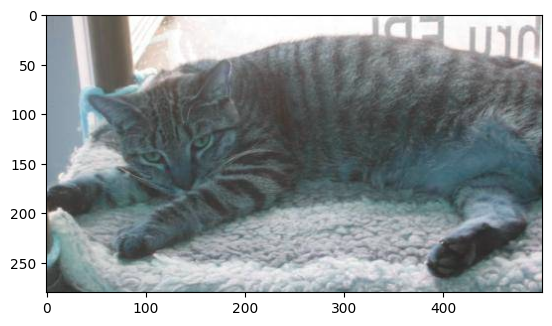

In [49]:
plt.imshow(test_img)

In [50]:
test_img.shape

(280, 500, 3)

In [51]:
test_img = cv2.resize(test_img, (256,256))

In [52]:
test_input = test_img.reshape((1,256,256,3))

In [53]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.]], dtype=float32)